# This is Alphabates Prediction From (A-J) respect to (0-9) numbers.



**All Required Libraries to work done.**

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import pickle

**i all cleaned my dataset so i just load it back
if you want to know more about the cleaning,reshaping,and Type Conversion you can check out the
https://github.com/rizwan777/ML-DS-DA/blob/master/Kaggle_work/NotMnist_A2J.ipynb file it will help you to batter understanding.

In [5]:
X_features = pickle.load(open(".\\NotMnist_filterd_data\\X_features.pickle","rb"))
Y_labels = pickle.load(open(".\\NotMnist_filterd_data\\Y_labels.pickle","rb"))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_features, Y_labels, test_size=0.2, random_state=13)

In [7]:
len(X_train),len(X_val),len(y_train),len(y_val)
# totally 1120 images From 896 image for X_train, 224 imge for X_val

(14979, 3745, 14979, 3745)

**Just Verifying the dataset is loaded properly and also its check for the shape.**

In [8]:
X_train[10].shape, y_train[10]

((100, 100), 6)

**lets open any random image from the dataset**

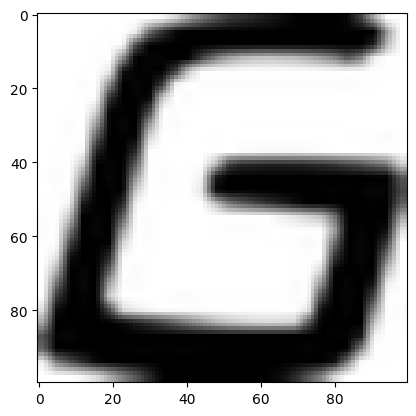

In [9]:
plt.imshow(np.squeeze(X_train[10]),cmap="binary")
plt.show()
# yeah features of array with label match correctly .. here [A-J] match with[0-9]

**In First Line we need to reshape the size of the image to fit well as input.
we need to pass again three args overhear also otherwise its just make it single vector array.**

In [10]:
X_features = np.array(X_train).reshape(-1,100,100,1) 
# we need to pass again three args overhear also otherwise its just make it single vector array.
Y_labels = np.array(y_train).reshape(-1)
X_features.shape, Y_labels.shape

((14979, 100, 100, 1), (14979,))

In [11]:
np.max(X_features[10])

255

* **Below code will inable the GPU processing and it will used half of the memory to perform the operation.**

In [12]:
for i in Y_labels[20:30]:
    print(i)

8
1
8
1
6
6
2
3
6
7


In [13]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess = tf.compat.v1.Session(config = tf.compat.v1.ConfigProto(gpu_options=gpu_options))
# normalization of data for easy to calculations.
X_features = X_features/255.0

In [14]:
# i dont want to run and test now its take time to train the data.
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Activation,MaxPool2D,Dropout,Flatten
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=X_features.shape[1:]))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss="sparse_categorical_crossentropy",optimizer="RMSprop",metrics=['accuracy'])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      640       
                                                                 
 activation (Activation)     (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 50, 50, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 128)       0         
 g2D)                                                   

In [16]:
history=model.fit(X_features,Y_labels,batch_size=64,epochs=4,validation_split=0.3)


164/164 [==============================] - 187s 1s/step - loss: 0.5605 - accuracy: 0.8359 - val_loss: 0.3612 - val_accuracy: 0.9019


In [17]:
predict = model.predict([X_features])
predict, predict.shape

469/469 [==============================] - 48s 103ms/step


(array([[2.0679941e-05, 2.1758926e-04, 1.3642240e-04, ..., 2.2859784e-05,
         1.9221379e-03, 2.0651451e-06],
        [1.3836814e-04, 9.6393448e-01, 1.7369321e-03, ..., 3.6287636e-03,
         1.1565084e-04, 2.6472246e-05],
        [1.8984752e-03, 1.5088567e-02, 1.5051630e-01, ..., 4.8114563e-04,
         1.0258968e-02, 1.8417785e-02],
        ...,
        [9.9735701e-01, 2.2276507e-05, 9.5074520e-06, ..., 2.2622852e-03,
         6.1680745e-05, 4.8358172e-05],
        [5.1115472e-05, 9.8309247e-05, 3.2044059e-04, ..., 1.9369709e-05,
         5.5926852e-03, 9.9249119e-01],
        [1.1159984e-02, 1.3504328e-03, 2.9251553e-06, ..., 9.8664099e-01,
         1.4178912e-05, 9.3869576e-06]], dtype=float32),
 (14979, 10))

In [1]:
np.argmax(predict[222])  # lets test any number from the predictions

NameError: name 'np' is not defined

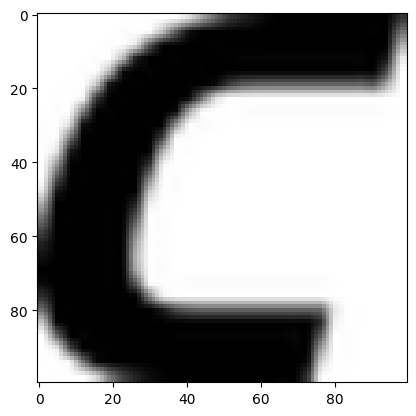

In [22]:
plt.imshow(np.squeeze(X_features[222]),cmap="binary")
plt.show()